<a href="https://colab.research.google.com/github/disha1997/Applied-Linear-Algebra/blob/main/AML5151%20ALA%20%20Final%20LAB%20EXAM%20SAI_DISHA_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


**$$\color{orange}{AML\ 5151\,\lvert\, Applied\ Linear\ Algebra\,\lvert\,Lab\ Final\,\lvert\,Odd\ Semester\ 2023}$$**

---

**Instructions:**
1. There are 2 problems with sub-parts to each problem;
2. You are welcome to refer to any non-human resource for answering the questions but you must *not* discuss your questions or code with anyone else, inside or outside the class;
3. By submitting your work, you are implicitly honoring the agreement above;
4. You might be called for a one-on-one during the final exam after reviewing your submission to explain your code and answer additional questions. Failure to justify your code and answers will result in significant points docked from your final exam score.

---

**Upload the following two files by clicking [here](https://learnermanipal-my.sharepoint.com/:f:/g/personal/sudarsan_acharya_manipal_edu/Es9TcouX6qtNkvljyGPBukABcPKB_7OdeczAVPqystz1eg)**

1. Completed code clearly showing the output cells (.ipynb file) **with the naming convention example** $$\color{cyan}{\text{ALA_LabFinal_SudarsanAcharya.ipynb}}$$ and
2. PDF of your completed code clearly showing the output cells (go to file->print->save as PDF choosing Landscape orientation) **with the naming convention example** $$\color{cyan}{\text{ALA_LabFinal_SudarsanAcharya.pdf}}$$


---

In [ ]:
## Load Libraries
import numpy as np
import sympy as sp
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn-whitegrid')
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import random
from scipy import stats

<ipython-input-55-f5ec7340301a>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


---

**Note**: the following function produces a component plot of a vector. Just run the cell.

---


In [ ]:
def plotveccomp(x, name = ' ', color = 'black', marker = '*', axis = None):
  ax = axis
  component_index = range(0, len(x))
  ax.plot(component_index, x, color = color, marker = marker)
  ax.plot(component_index, [np.mean(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='blue')
  ax.plot(component_index, [np.mean(x) - np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  ax.plot(component_index, [np.mean(x) + np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  ax.set_xlabel('Index')
  ax.set_ylabel('Value')
  ax.set_title('Component plot of '+name)

---

**Note**: the following function generates a random $n\times n$-matrix for a given input $n.$ The entries of the matrix are *normally* distrbuted with mean 0 and standard deviation 1. Just run the cell.

---

In [ ]:
def genrandMatrix(n):
  A = np.random.normal(0, 1, (n, n))
  return(A)

---

**Question-1.1**: Generate a $8\times 8$-random matrix and flatten it into a 1D-vector $a$.

---

In [ ]:
n = 8
a = genrandMatrix(n).flatten()
print(a.shape)

(64,)


---

**Question-1.2**: Make a component plot of the vector $a$.

---

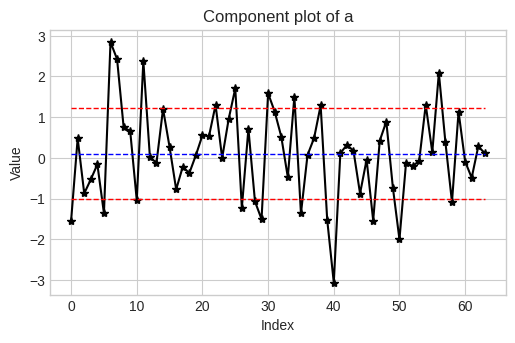

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (6,4))
fig.tight_layout(pad = 4.0)
plotveccomp(a, 'a', 'black', '*', ax)

---

**Question-1.3**: What percentage of components of $a$ are within 1 standard deviation from the mean? Is the result a familiar number?

---

In [ ]:
(np.mean(abs(a-np.mean(a)) <= 1*np.std(a)))*100

65.625

It follows empirical formula (normal distribution)

---

**Note**: The following function generates a so called *Hadamard matrix* $H.$ Run the cell, and observe the columns of the matrix.

---

In [ ]:
from scipy.linalg import hadamard
H = hadamard(4)
print(H)

[[ 1  1  1  1]
 [ 1 -1  1 -1]
 [ 1  1 -1 -1]
 [ 1 -1 -1  1]]


---

**Question-1.4**: Check if the columns of the Hadamard matrix generated above are linearly independent.

---

In [ ]:
AugmentedMatrix = sp.Matrix(H)
print(AugmentedMatrix.rref())

(Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]]), (0, 1, 2, 3))


Yes the columns of Hadamard Matrix is linearly independent as there no free variables and all are pivot variables

---

**Question-1.5**: Generate a Hadamard matrix with number of rows and columns equal to the size of vector $a$.

---

In [ ]:
H = hadamard(len(a))

In [ ]:
print(H)

[[ 1  1  1 ...  1  1  1]
 [ 1 -1  1 ... -1  1 -1]
 [ 1  1 -1 ...  1 -1 -1]
 ...
 [ 1 -1  1 ... -1  1 -1]
 [ 1  1 -1 ...  1 -1 -1]
 [ 1 -1 -1 ... -1 -1  1]]


---

**Question-1.6**: Check if the columns of $H$ are mutually orthogonal.

---

In [ ]:
for i in range(len(a)-1):
  for j in range(len(a)-1):
    if i!=j:
      if np.dot(H[:,i], H[:,i+1]) == 0:
        continue
      else:
        print('False')

In [ ]:
#dot product of any two rows or column will be 0 for hadamard matrix
np.dot(H.T, H)

array([[64,  0,  0, ...,  0,  0,  0],
       [ 0, 64,  0, ...,  0,  0,  0],
       [ 0,  0, 64, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 64,  0,  0],
       [ 0,  0,  0, ...,  0, 64,  0],
       [ 0,  0,  0, ...,  0,  0, 64]])

yes, they are mutually orthogonal

---

**Question-1.7**: Normalize the columns of $H.$ That is, divide each column of $H$ by the $l_2$-norm of that column.

---

In [ ]:
for i in range(len(a)):
  print(H[:,i] / np.linalg.norm(H[:,i]))

[0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125
 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125
 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125
 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125
 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125
 0.125 0.125 0.125 0.125]
[ 0.125 -0.125  0.125 -0.125  0.125 -0.125  0.125 -0.125  0.125 -0.125
  0.125 -0.125  0.125 -0.125  0.125 -0.125  0.125 -0.125  0.125 -0.125
  0.125 -0.125  0.125 -0.125  0.125 -0.125  0.125 -0.125  0.125 -0.125
  0.125 -0.125  0.125 -0.125  0.125 -0.125  0.125 -0.125  0.125 -0.125
  0.125 -0.125  0.125 -0.125  0.125 -0.125  0.125 -0.125  0.125 -0.125
  0.125 -0.125  0.125 -0.125  0.125 -0.125  0.125 -0.125  0.125 -0.125
  0.125 -0.125  0.125 -0.125]
[ 0.125  0.125 -0.125 -0.125  0.125  0.125 -0.125 -0.125  0.125  0.125
 -0.125 -0.125  0.125  0.125 -0.125 -0.125  0.125  0.125 -0.125 -0.125
  0.125  0.

In [ ]:
H_normalized = H / np.linalg.norm(H,axis=1)
print(H_normalized)

[[ 0.125  0.125  0.125 ...  0.125  0.125  0.125]
 [ 0.125 -0.125  0.125 ... -0.125  0.125 -0.125]
 [ 0.125  0.125 -0.125 ...  0.125 -0.125 -0.125]
 ...
 [ 0.125 -0.125  0.125 ... -0.125  0.125 -0.125]
 [ 0.125  0.125 -0.125 ...  0.125 -0.125 -0.125]
 [ 0.125 -0.125 -0.125 ... -0.125 -0.125  0.125]]


---

**Question-1.8**: Print the $l_2$ norms of the columns of the normalized version of $H.$ What do you observe?

---

In [ ]:
np.linalg.norm(H_normalized, axis = 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

all entries of the vector matrix become 1

---

**Question-1.9**: Calculate the scalar projections (shadow lengths) of vector $a$ projected on to the columns of the normalized version of $H$ and store them in a vector $u.$

---

In [ ]:
u = np.dot(a, H_normalized)

In [ ]:
u

array([ 0.78258605, -0.39761764, -1.43552352,  0.08361823, -0.93799037,
       -1.92960602,  2.45816214,  1.20118852, -0.27279265,  2.05913487,
       -0.08219573, -1.37979716, -2.35605393,  0.39620317, -0.01083405,
        0.01051313, -0.43881131, -0.23972718, -1.18623333, -1.45362195,
       -0.40779417,  0.13881235, -1.39455503, -1.5096043 ,  0.81497631,
        1.33818101, -0.17099812, -0.25023698,  0.52750036,  0.13881163,
        2.07121029, -0.25285368,  1.40414593, -0.71771843, -1.3051002 ,
        0.31449161, -0.69117553, -1.64363573,  1.73627078, -0.14434671,
       -0.73735324, -1.15293942, -0.85007957, -0.16774212, -0.96953615,
        0.02091445, -0.85581021, -1.71523579,  0.94085491, -0.13826639,
       -0.04671607,  1.96422268, -0.38100654, -0.76378645,  1.58722618,
        1.38089608, -1.21779396, -1.497908  , -1.37497415, -0.00924616,
       -1.00218523, -0.34453442,  1.5381198 , -1.43298457])

In [ ]:
u = np.dot(H_normalized.T, a)
u

array([ 0.78258605, -0.39761764, -1.43552352,  0.08361823, -0.93799037,
       -1.92960602,  2.45816214,  1.20118852, -0.27279265,  2.05913487,
       -0.08219573, -1.37979716, -2.35605393,  0.39620317, -0.01083405,
        0.01051313, -0.43881131, -0.23972718, -1.18623333, -1.45362195,
       -0.40779417,  0.13881235, -1.39455503, -1.5096043 ,  0.81497631,
        1.33818101, -0.17099812, -0.25023698,  0.52750036,  0.13881163,
        2.07121029, -0.25285368,  1.40414593, -0.71771843, -1.3051002 ,
        0.31449161, -0.69117553, -1.64363573,  1.73627078, -0.14434671,
       -0.73735324, -1.15293942, -0.85007957, -0.16774212, -0.96953615,
        0.02091445, -0.85581021, -1.71523579,  0.94085491, -0.13826639,
       -0.04671607,  1.96422268, -0.38100654, -0.76378645,  1.58722618,
        1.38089608, -1.21779396, -1.497908  , -1.37497415, -0.00924616,
       -1.00218523, -0.34453442,  1.5381198 , -1.43298457])

---

**Question-1.10**: Make a component plot of $a$ and $u$ in two figures. Use different colors for the vectors.

---

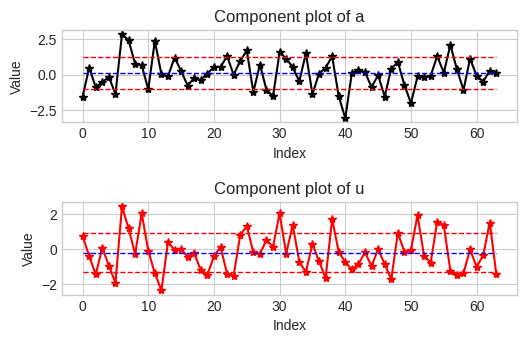

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (6,4))
fig.tight_layout(pad = 4.0)
plotveccomp(a, 'a', 'black', '*', ax1)
plotveccomp(u, 'u', 'red', '*', ax2)

---

**Question-1.11**: What percentage of components of $u$ are within 1 standard deviation from the mean? What do you observe from the result?

---

In [ ]:
(np.mean(abs(u-np.mean(u)) <= 1*np.std(u)))*100

60.9375

It follows empirical formula of normal distribution

---

**Question-2**: Consider the following model for opinion formation among $n$ individuals, each of whom interact with a certain number of individuals in the group. The numerical value of the $i$th person's opinion is denoted as $x_i.$ The value of $x_i$ is influenced by the following:
* The $i$th person's self opinion denoted as
$s_i$
* The opinions of the remaining individuals $x_j,$ where $j=1,2,\ldots,n$ and $j\neq i.$  

Assuming that the $i$th person gives a weightage $w_{ij}$ to the $j$th person's opinion, we can compute $x_i$ as follows:
$$x_i = \dfrac{s_i+\sum_{j\neq i}w_{ij}x_j}{1+\sum_{j\neq i}w_{ij}},\quad i=1,\ldots,n.$$
It is clear that the weightage that a person gives to his own opinion is taken to be $1$ as seen in the denominator of the equation above.

The equation above can be written as $(A+I)x=s,$ where $A$ is an $n\times n$-matrix and $I$ represents the identity matrix.

The code snippet below simulates the $n\times n$-matrix $W$ representing the weights and the $n$-vector $s$ representing the self opinions for some topic of interest. Just run the cell. Note that $W$ is a *sparse matrix* with most of its entries equal to zero; that is, each individual interacts only with a few others.

---

In [ ]:
# Simulating a social network weight matrix and self-opinion vector
np.random.seed(1)
rs = 2023
n = 100
rvs = stats.norm(0, 0.3).rvs
W = random(n, n, density = 0.2, random_state = rs, data_rvs = rvs).A
# Each individual gives the highest weight (= 1) to her-/himself
np.fill_diagonal(W, 1)
W = np.where(W > 1, 1, W)
W = np.where(W < -1, -1, W)
s = stats.norm(0, 4).rvs(size = n)
s = MinMaxScaler((-10, 10)).fit_transform(s.reshape(-1, 1)).flatten()

---

**Question-2.1**: The self opinion values range from -10 to 10 indicating a very negative and a very positive opinion, respectively, about the topic of interest. Does the average self opinion value indicate a positive, negative, or neutral opinion about the topic?

---

In [ ]:
avg = np.mean(s)

negative


In [ ]:
avg

-0.13326690030952676

---

**Question-2.2**: Make a component plot of the self opinion vector $s$.

---

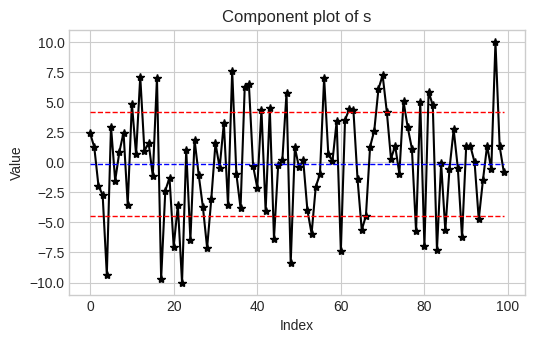

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (6,4))
fig.tight_layout(pad = 4.0)
plotveccomp(s, 's', 'black', '*', ax)

---

**Question-2.3**: Suppose we consider self opinion values beyond 2 standard deviations from the mean as being extreme. What percentage of individuals have extreme opinions about the topic of interest?

---

In [ ]:
(np.mean(abs(u-np.mean(u)) >= 2*np.std(u)))*100

4.6875

---

**Question-2.4**: Construct the matrix $A$ and the identity matrix $I$ in the code snippet below.

---

In [ ]:
A = np.zeros((n, n))
for i in np.arange(n):
  A[i, i] = np.sum(W[i, :]) - W[i,i]
  for j in np.arange(n):
    if j != i:
      A[i, j] = -W[i, j]
I = np.identity(n)

---

**Question-2.5**: Solve the system of equations $(A+I)x = s.$

---

In [ ]:
solution = linalg.lstsq(A+I, s)
x = solution[0]

In [ ]:
s = np.dot((A+I),x)

---

**Question-2.6**: Does the average of the opinion values calculated above indicates a positive, negative, or neutral opinion about the topic?

---

In [ ]:
avg = np.mean(x)

negative


In [ ]:
avg

-1.9666086135775658

---

**Question-2.7**: Using the opinion values computed above, calculate the percentage of individuals have extreme opinions about the topic of interest?

---

In [ ]:
(np.mean(abs(s-np.mean(s)) >= 2*np.std(s)))*100

4.0